In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [16]:
from sklearn.datasets import fetch_lfw_people

In [17]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [18]:
type(faces)

sklearn.utils.Bunch

In [19]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [20]:
faces.images[0].shape

(62, 47)

In [21]:
faces.data[0].size

2914

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca.explained_variance_ratio_

array([0.187768  , 0.14548893, 0.07103538, 0.0602675 , 0.05040751,
       0.02936603, 0.02470631, 0.02047523, 0.01968442, 0.0189178 ,
       0.01560986, 0.01470453, 0.01214073, 0.01095573, 0.01042818,
       0.00972053, 0.00906779, 0.00876522, 0.00813087, 0.00705089,
       0.00682341, 0.00648109, 0.00603545, 0.00578568, 0.00532363,
       0.00520648, 0.00500154, 0.00476372, 0.0045244 , 0.00425309,
       0.00405166, 0.00380145, 0.00360033, 0.00350987, 0.00347687,
       0.00324891, 0.00314406, 0.00310621, 0.00307643, 0.00290165,
       0.00282754, 0.0027487 , 0.00272783, 0.00259985, 0.00246388,
       0.00238214, 0.0023496 , 0.00231576, 0.00227235, 0.00221907,
       0.00210642, 0.00205901, 0.00202986, 0.00200763, 0.00195911,
       0.00195431, 0.00188171, 0.00182909, 0.00176752, 0.00175944,
       0.00174918, 0.00166451, 0.00161346, 0.00158637, 0.0015662 ,
       0.00152925, 0.00149928, 0.00146113, 0.0014524 , 0.00141117,
       0.00140531, 0.00136441, 0.0013622 , 0.00131671, 0.00129

In [24]:
x = sum(pca.explained_variance_ratio_)

In [28]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nreconstruction')

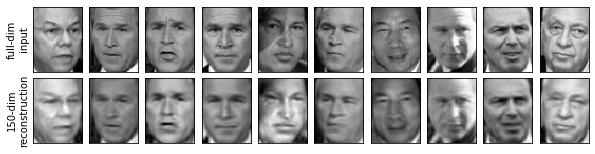

In [29]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')